## Notebook E-tivity 2 CE4021 Linear Regression

Student name: Deventhiran Ranganathan

Student ID: 23315695

<hr style="border:2px solid gray"> </hr>

## Imports

In [109]:
import numpy as np
import matplotlib.pyplot as plt

If you believe required imports are missing, please contact your moderator.

<hr style="border:2px solid gray"> </hr>

## Reference Implementation

In [110]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [111]:
def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

Load data from file (including bias of 1)

In [112]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

Apply data to linear regression algorithm to obtain weights

In [113]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

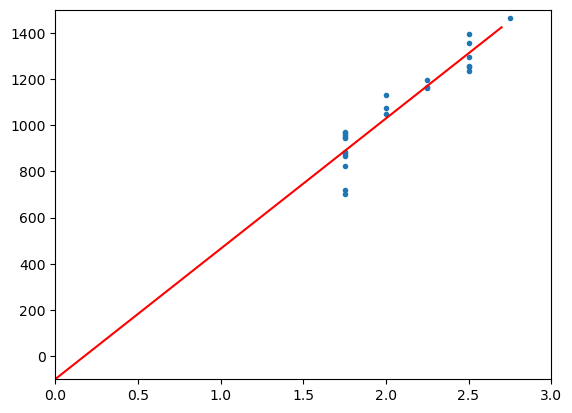

In [114]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

<hr style="border:2px solid gray"> </hr>

## Task

You may add as many cells as you require to complete this task.

## Introduction

A linear regression model establishes the relation between a dependent variable(y) and at least one independent variable(x).

Above reference implementation uses the Ordinary Least Squares method and the formula is np.
linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
Here inv is inverse of matrix, .T is transpose of matrix, dot is multiplication of matrix

## Multiplication of matrix(dot product)

For matrix multiplication, the number of columns in the first matrix must be equal to the number of rows in the second matrix.

The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix

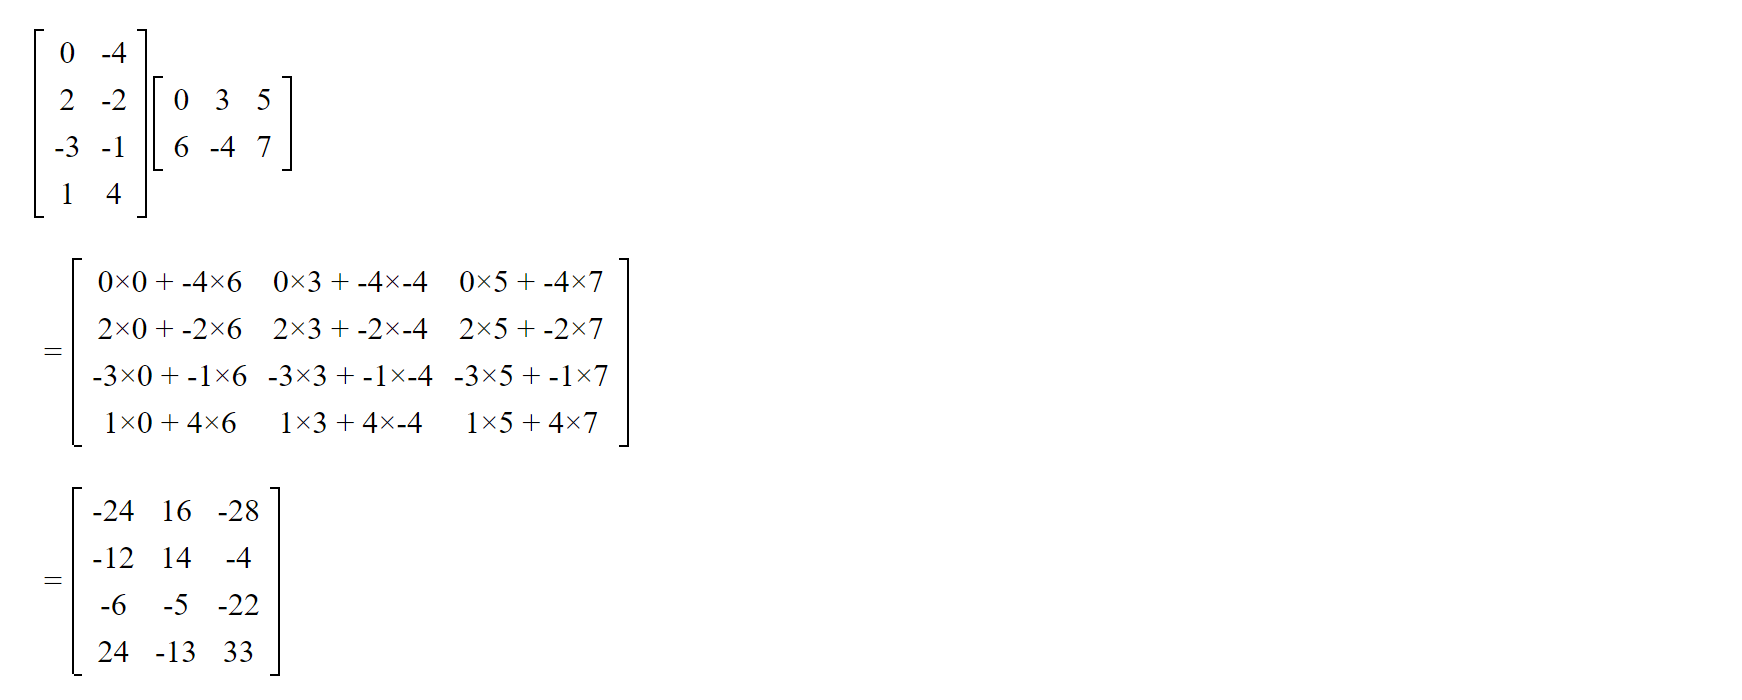

In [115]:
def mul(N,M):
    row_size=M.shape[0]
    col_size=M.shape[1]
    result_matrix = np.zeros(shape=[row_size,col_size])
    for u in range(len(N)):
        for o in range(len(M[0])):
            for p in range(len(M)):
                result_matrix[u][o] += N[u][p] * M[p][o]
    return result_matrix[~np.all(result_matrix == 0, axis=1)]

## Transpose of Matrix

In linear algebra,

the transpose of a matrix is an operator which flips a matrix over its diagonal; that is, it switches the row and column indices of the matrix A by producing another matrix, often denoted by AT 
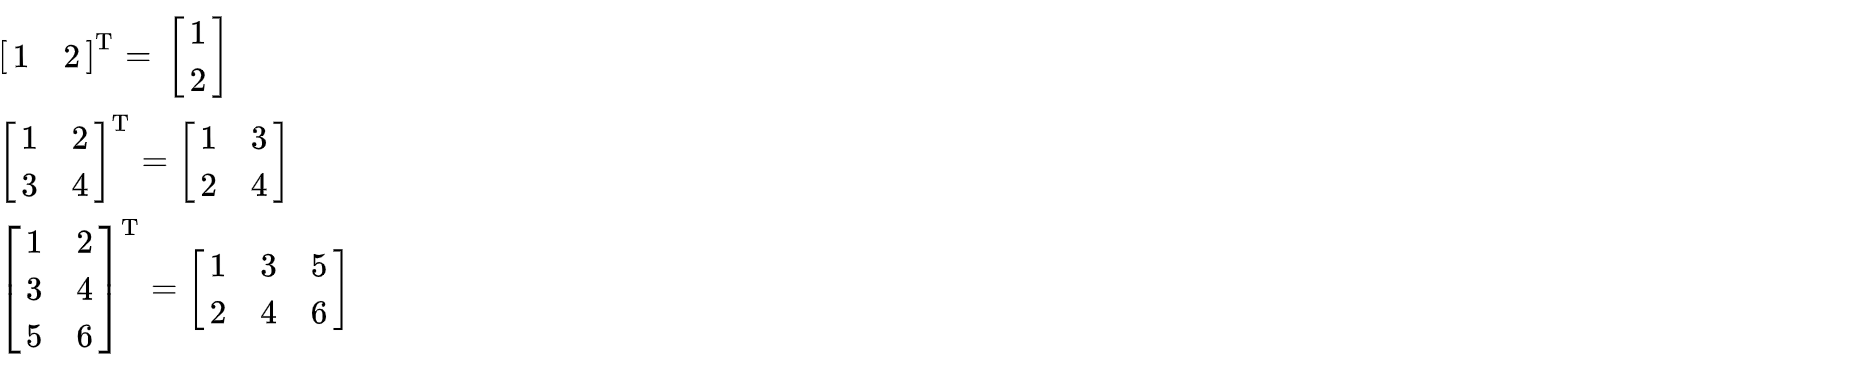

In [ ]:
def transpose_of_matrix(X)->np.array:
    row_size=X.shape[0]
    col_size=X.shape[1]
    trans_matrix = np.zeros(shape=[col_size,row_size])
    for i in range(row_size):
        for j in range(col_size):
            trans_matrix[j,i]=X[i,j]
    return trans_matrix

In [ ]:
m=np.array([[1,2],[3,4],[5,6]])
tran_of_mat=transpose_of_matrix(m)
print(tran_of_mat)

[[1. 3. 5.]
 [2. 4. 6.]]


<hr style="border:2px solid gray"> </hr>

## Determinant of Matrix

In mathematics, the determinant is a scalar value that is a function of the entries of a square matrix. The determinant of a matrix A is commonly denoted det(A), det A, or |A|. Its value characterizes some properties of the matrix and the linear map represented by the matrix. In particular, the determinant is nonzero if and only if the matrix is invertible and the linear map represented by the matrix is an isomorphism. The determinant of a product of matrices is the product of their determinants (which follows directly from the above properties).

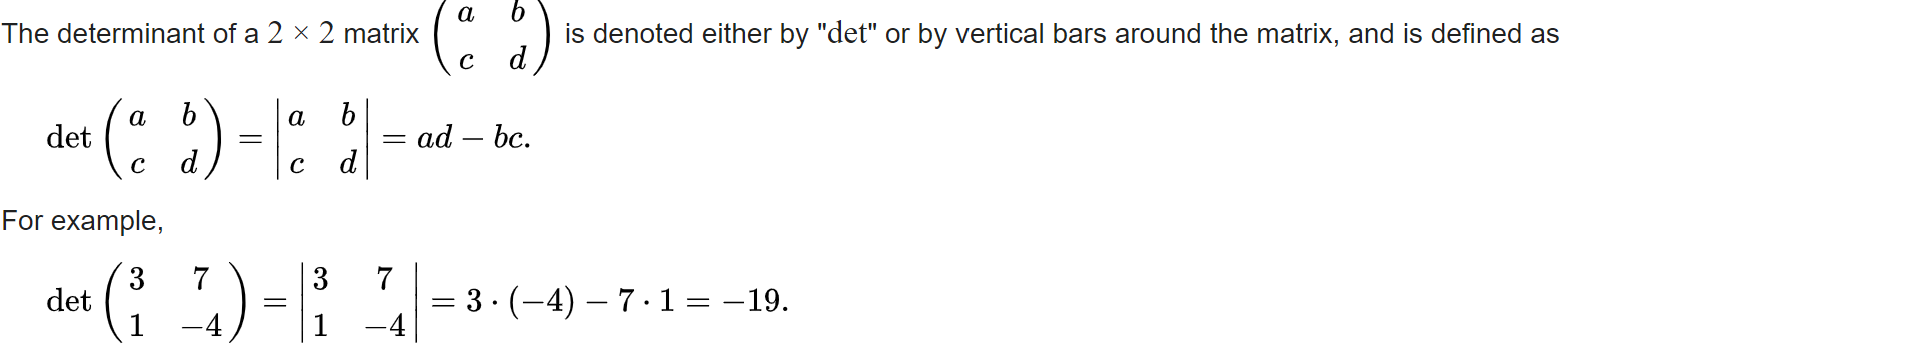

In [ ]:
def getMatrixDeterminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

In [ ]:
m=np.array([[4, 2],[6,5]])
det=getMatrixDeterminant(m)
print(m)

[[4 2]
 [6 5]]


## Inverse of matrix

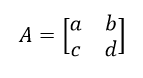

Given A is as above, in order to calculate the inverse A^{-1},

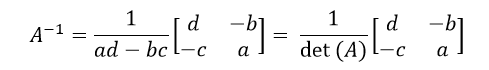

It must be noted that in order for this to be true, det(A) cannot equal to 0. A matrix with its determinant equal to zero does not have an inverse.

Application

Given that:

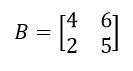

Find the inverse of B.

First of all, find the determinant a * d – b * c.
det(B) = 4*5 – 6*2 = 8

Apply the formula for the inverse. This gives:

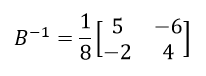

In [ ]:
def getMatrixInverse(m):
    determinant = getMatrixDeterminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

In [ ]:
m=np.array([[4, 2],[6,5]])
inv_matrix=getMatrixInverse(m)
print(inv_matrix)

[[0.625, -0.25], [-0.75, 0.5]]


## Linear weights


In [ ]:
def linreg_weights(X,y):
    # Calculation of weights using pseudo-inverse. Note that X needs to contain the bias of 1
  xt= transpose_of_matrix(X)
  return mul(mul(getMatrixInverse(mul(xt,X)),xt),np.array(y))

## Predicate

def linreg_predict(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(mul(transpose_of_matrix(w),x))
    return np.array(out)

In [ ]:
data = np.loadtxt('lr_data.csv', delimiter=',')
X = data[:,0:2]
print(X)
y= [[data[i,2]] for i in range(0,len(data[:,2]))]

[[1.   2.75]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.5 ]
 [1.   2.25]
 [1.   2.25]
 [1.   2.25]
 [1.   2.  ]
 [1.   2.  ]
 [1.   2.  ]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]
 [1.   1.75]]


In [ ]:
weights = linreg_weights(X,y)
weights

array([[-99.46431881],
       [564.20389249]])

(0.0, 3.0, -100.0, 1500.0)

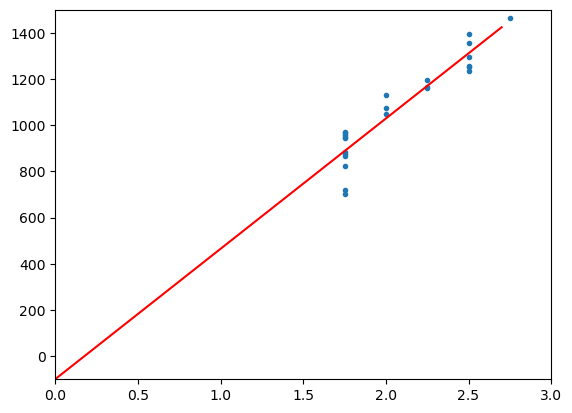

In [ ]:
ind = np.arange(0,2.8,0.1)
plt.plot(X[:,1],y,'.')
plt.plot(ind, ind*weights[1]+weights[0],'r')
plt.axis([0, 3, -100, 1500])

## Reflection

Write your reflection in below cell.